In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *
from logreg import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

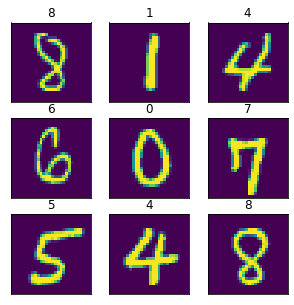

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
# Preprocess Y for our NN
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1

In [6]:
y_test_onehot.shape

(14000, 10)

In [7]:
FFNN = FFNNClassifier(
    X=X_train,
    Y=y_train,
    activation=ActivationFunctions.ReLU,
    network_shape=[30]
)

TypeError: __init__() got an unexpected keyword argument 'init_method'

In [ ]:
FFNN.train(int(len(y_train) / 32), 0.01, 100)

In [ ]:
y_pred = FFNN.predict(X_test)

In [ ]:
y_test_model = np.argmax(y_pred,axis=1)

In [ ]:
y_test_data = np.argmax(y_test_onehot,axis=1)

In [ ]:
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)
print(score)

In [ ]:
np.random.randn(X_train.shape[1], y_train_onehot.shape[1]).shape

In [12]:
reg_w = logreg(
    x = X_train, 
    y = y_train_onehot, 
    M = int(len(y_train_onehot)/32), 
    init_w = np.random.randn(X_train.shape[1], y_train_onehot.shape[1]), 
    n_epochs = 100, 
    learning_rate = 0.01, 
    momentum = 0.75, 
    lambd=None)

y_predict = np.exp(X_test @ reg_w)/np.sum(np.exp(X_test @ reg_w),axis=1,keepdims=True)

y_test_model = np.argmax(y_predict,axis=1)
y_test_data = np.argmax(y_test_onehot,axis=1)
score = sum(np.equal(y_test_data, y_test_model)) / len(y_test_data)
print(score)

0.9137142857142857


In [ ]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30],
    activation = "relu"
)
SKL_NN.fit(X_train, y_train)

In [ ]:
SKL_NN.score(X_test, y_test)

In [ ]:
SKL_NN.predict(X_test)[0:10]